<pre style='font-size :25px; text-align: center'><b>ASSIGNMENT 3</b></pre>
<pre style='font-size :20px'><b>MULTICLASSIFICATION</b></pre>
<pre style='font-size :15px'>Welcome to your last assignment in classification section.
Today you will work with a famous NIST handwritten digit recognition dataset that is
available via sklearn.datasets module. You will experience the effect of scaling in terms of 
statistic measures and visualize multiclassification decision boundaries. 
As in the previous assignment you will find the best classifier 
with best hyperparameters using predefined functions. With all this said, let's get started.
</pre>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Loading, scaling and visualization of data</b></pre>
<pre style='font-size : 15px;'>Firstly let's import necessary packages and load our data.
We'll also set a random seed to 5.</pre>

In [54]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
seed = 5

In [55]:
digits = load_digits()

In [100]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

<pre style='font-size : 15px;'>It's useful to read the description of the dataset
to construct some intuition and to understand with what we are working.
Actually, sklearn digit recognition dataset includes only a part of bigger dataset 
described below (1797 samples).</pre>

In [97]:
digits.DESCR.split('\n')

['.. _digits_dataset:',
 '',
 'Optical recognition of handwritten digits dataset',
 '--------------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 5620',
 '    :Number of Attributes: 64',
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.',
 '    :Missing Attribute Values: None',
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)",
 '    :Date: July; 1998',
 '',
 'This is a copy of the test set of the UCI ML hand-written digits datasets',
 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits',
 '',
 'The data set contains images of hand-written digits: 10 classes where',
 'each class refers to a digit.',
 '',
 'Preprocessing programs made available by NIST were used to extract',
 'normalized bitmaps of handwritten digits from a preprinted form. From a',
 'total of 43 people, 30 contributed to the training set and different 13',
 'to the test set. 32x32 bitmaps are

<pre style='font-size : 15px;'>As our data is loaded in a dict form we can easily extract
features and targets from it as shown below.</pre>

In [101]:
data_X = digits.data
data_y = digits.target

In [102]:
data_X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [103]:
data_y

array([0, 1, 2, ..., 8, 9, 8])

In [104]:
print(data_y.shape)

(1797,)


In [105]:
print(data_X.shape)

(1797, 64)


<pre style='font-size : 15px;'>Now let's visualize some random samples from our data using matplotlib.</pre>

           Number 3


<Figure size 432x288 with 0 Axes>

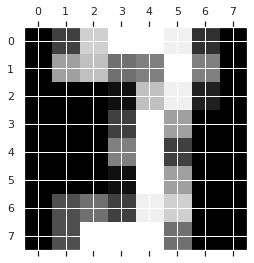

In [133]:
idx = random.randint(0,data_X.shape[0])
arr = digits.images[idx]
plt.gray();
plt.matshow(arr);
print('           Number {}'.format(data_y[idx]));

<pre style='font-size : 15px;'>We are dealing with 10 classes of grayscale images 
that contain handwritten digits from 0 to 9. To understand the perfomance of the classifier
we need to choose a proper metric. Thus, we need to understand if our data is balanced. 
For this stuff we ploted the distribution of number of samples below.</pre>

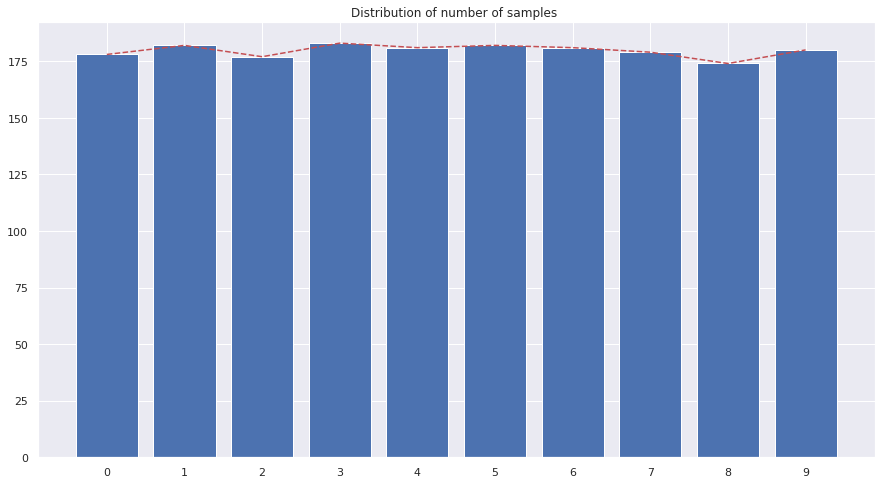

In [111]:
dict_counter = dict(Counter(data_y))
values = list(dict_counter.values())
keys = list(dict_counter.keys())
sns.set()
plt.figure(figsize=(15,8));
plt.title('Distribution of number of samples ')
plt.bar(range(len(values)),values);
plt.plot(range(len(values)),values,'--r')
plt.xticks(range(len(values)));

<pre style='font-size : 15px;'>From the inset above it's obvious that our data is balanced.
Thus, as the main metric we will use accuracy. Our data is already processed and all the pixels
are in range from 0 to 16. Let's see some statistical measures of our data. </pre>

In [114]:
print('Mean : {}, standard diviation : {}, variance : {}'.format(np.mean(data_X),np.std(data_X),np.var(data_X)))

Mean : 4.884164579855314, standard diviation : 6.016787548672236, variance : 36.20173240585726


<pre style='font-size : 15px;'>Hm, despite the fact that data is already processed we still have a high variance. We can change the situation by performing max scaling. </pre>

In [115]:
data_X = data_X/16

In [117]:
data_X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [118]:
print(np.mean(data_X),np.std(data_X),np.var(data_X))

0.30526028624095713 0.3760492217920148 0.1414130172103799


<pre style='font-size : 15px;'>Now we have all the data squashed into the interval from 0 to 1.
As you see the variance decreased. We are ready to train the classifier.</pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Training classifiers</b></pre>
<pre style='font-size : 15px;'>We will firstly train a LogisticRegression with intuitive hyperparameters
and validate it with cross_val_score.</pre>

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [124]:
clf = LogisticRegression(C=100,random_state=seed,penalty='l2')
score = cross_val_score(clf,data_X, data_y, scoring='accuracy',cv=5)

/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/volodymyr/envs/courses_env/l

In [125]:
print('Mean accuracy score for Logistic Regression : {}'.format(np.mean(score)))

Mean accuracy score for Logistic Regression : 0.9210482168718908


<pre style='font-size : 15px;'>Using simple logistic regression we got mean accuracy score of
92. We can plot the linear boundary of our classifier using PCA about which you will get much more details in unsupervised section. 
In a nutshell what PCA (principal component analysis) does is the process
of dimensionality reduction with respect to features. Thus we can easily visualze high-dimensional 
matrix by reducing it to just 2 dimensional. Function <b>plot_boundary</b> uses PCA to reduce
the dimensions of our features and then plots the decision boundary of the classifier with respect
to transformed features.</pre>

In [127]:
def plot_boundary(clf,dataset):
    h = 0.25
    pca = PCA(n_components=2)
    X = pca.fit_transform(dataset.data)
    clf.fit(X, dataset.target)
    plt.figure(figsize=(15,8))
    plt.title('Visualizing decision boundaries')
    plt.scatter(X[:,0], X[:,1], c=dataset.target)
    plt.figure(figsize=(15,8))
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=dataset.target)

/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


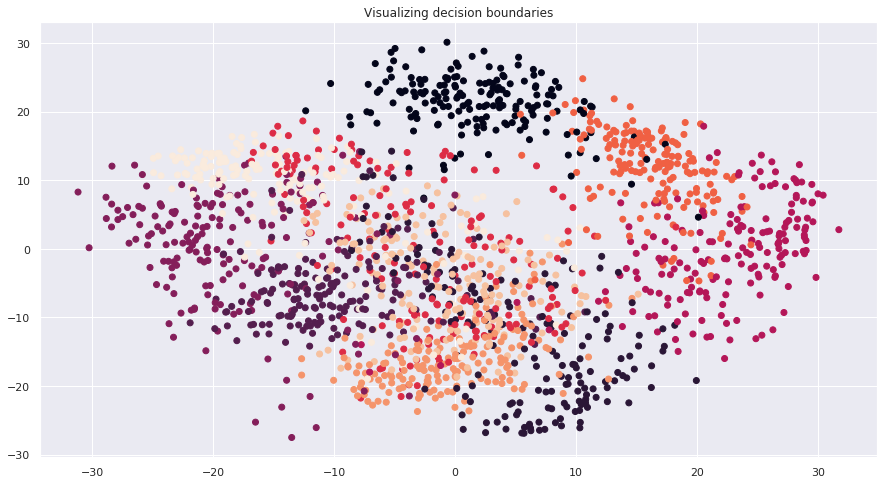

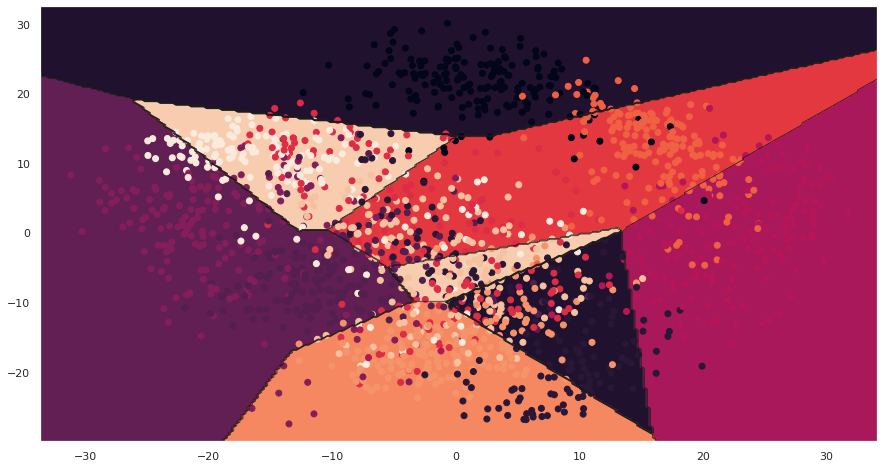

In [128]:
plot_boundary(clf,digits)

<pre style='font-size : 15px;'>The inset above should have helped you to undestand how
the decision boundary looks like for multiclassification tasks. The next step is to use the functions
with which you are already familiar to choose the best classifier.
Here we are searching for best classifier only among SVC and LogisticRegression because our data
is much more complex that the ones we used in the previous assignments and it might
take a long time to find the best classifier among many. Anyway we encourage you to add other 
classifiers to classifiers_dict and experiment with the tunable hyperparameters.</pre>

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [130]:
classifiers_dict = {'LogisticRegression':(LogisticRegression(
    random_state=seed),{'C' : [0.001,0.01,0.1,10,100],
                    'penalty' : ['l2', 'l1']
                    }),
 'SVC': (SVC(random_state=seed), {'C' : [0.001,0.01,0.1,10,100],
                    'kernel' : ['linear', 'poly', 'rbf'], 
                    'degree' : (1,2,3),
                    'gamma' : [0.001,0.01,0.1,10,100]
                                
                    })
}

In [131]:
def call_grid_search(clf,data_X,data_y,scoring,cv):
    classifier, params = clf
    kfolds = StratifiedKFold(cv)
    gscv = GridSearchCV(classifier,param_grid=params, cv=kfolds.split(data_X,data_y), scoring=scoring,n_jobs=-1)
    gscv.fit(data_X,data_y)
    return gscv
    
def choose_best_classifier(classifiers_dict,data_X,data_y,scoring='precision',cv=5):
    best_score = 0
    best_clf = None
    for name, clf in classifiers_dict.items():
        gscv = call_grid_search(clf,data_X,data_y,scoring,cv)
        score = gscv.best_score_
        print('Classifier : {0}, mean {1} : {2}'.format(name,scoring, score))
        if score>best_score:
            best_score = score
            best_clf = (name,gscv.best_estimator_)
    print('Best classifier : {0}, mean {1} : {2} '.format(best_clf[0],scoring,best_score))
    return best_clf

In [132]:
name, clf = choose_best_classifier(classifiers_dict,data_X,data_y,'accuracy')

/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classifier : LogisticRegression, mean accuracy : 0.9254312743461325
Classifier : SVC, mean accuracy : 0.9738452977184195
Best classifier : SVC, mean accuracy : 0.9738452977184195 


/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<pre style='font-size : 15px;'>Finaly, using greed search we found out that the best classifier among the two
highlited is SVC. You've already made a long way here and we hope that the received knowledge 
will help you to understand how to deal with classification tasks. We are looking forward to 
seeing you in action!</pre>